In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [97]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Analysis data

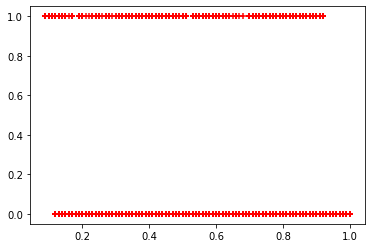

In [98]:
plt.scatter(df.satisfaction_level, df.left, marker='+', color='red')

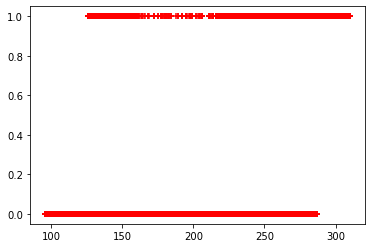

In [99]:
plt.scatter(df.average_montly_hours, df.left, marker='+', color='red')

In [100]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### The possible variables that have impact on retention are satisfaction_level, average_monthly_hours, time_spend_company, work_accident, promotion_last_5years

left       0     1
salary            
high    1155    82
low     5144  2172
medium  5129  1317


<AxesSubplot:xlabel='salary'>

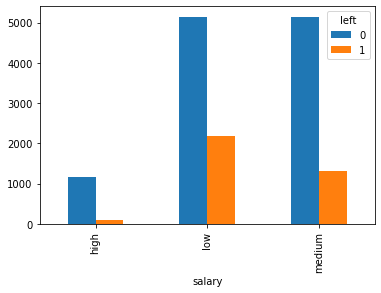

In [101]:
# pandas.crosstab() compute a frequency table
# pandas.plot() make a plot of Series or DataFrame
f_table = pd.crosstab(df.salary, df.left)
print(f_table)
f_table.plot(kind='bar')

<AxesSubplot:xlabel='time_spend_company'>

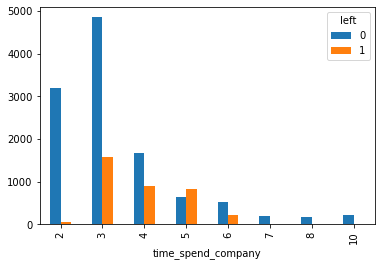

In [102]:
pd.crosstab(df.time_spend_company, df.left).plot(kind='bar')

<AxesSubplot:xlabel='promotion_last_5years'>

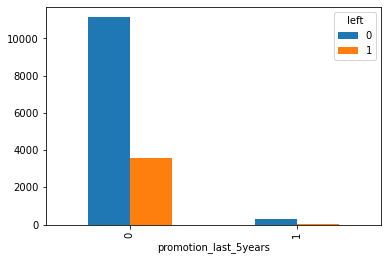

In [103]:
pd.crosstab(df.promotion_last_5years, df.left).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

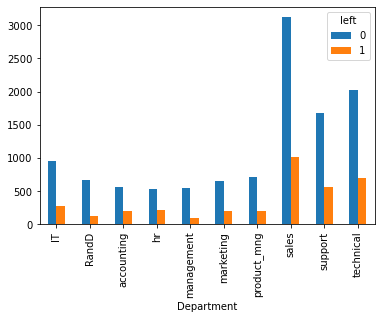

In [104]:
pd.crosstab(df.Department, df.left).plot(kind='bar')

### Build the model

In [105]:
df_featured = df.drop(['last_evaluation', 'number_project', 'Department'], axis='columns')
df_featured.head()

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,157,3,0,1,0,low
1,0.80,262,6,0,1,0,medium
2,0.11,272,4,0,1,0,medium
3,0.72,223,5,0,1,0,low
4,0.37,159,3,0,1,0,low


In [106]:
X = df_featured.drop('left', axis='columns')
X.head()

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,0.38,157,3,0,0,low
1,0.80,262,6,0,0,medium
2,0.11,272,4,0,0,medium
3,0.72,223,5,0,0,low
4,0.37,159,3,0,0,low


In [107]:
y = df_featured.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [108]:
ct = ColumnTransformer([('left', OneHotEncoder(dtype=int), ['salary'])], remainder='passthrough')
X = ct.fit_transform(X)

In [109]:
X

array([[0., 1., 0., ..., 3., 0., 0.],
       [0., 0., 1., ..., 6., 0., 0.],
       [0., 0., 1., ..., 4., 0., 0.],
       ...,
       [0., 1., 0., ..., 3., 0., 0.],
       [0., 1., 0., ..., 4., 0., 0.],
       [0., 1., 0., ..., 3., 0., 0.]])

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression(max_iter=1000)

In [111]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [112]:
model.score(X_test, y_test)

0.7656666666666667